In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [31]:
data, label = datasets.make_classification(n_samples = 1000, n_classes = 2, n_clusters_per_class = 1, 
                                          n_features = 2, n_informative = 2, n_redundant = 0, random_state = 3)

In [32]:
print(data.shape)

(1000, 2)


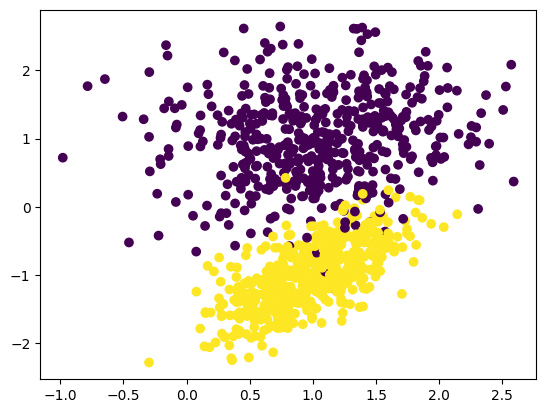

In [33]:
plt.scatter(data[:, 0], data[:, 1], c = label)

In [34]:
print(np.unique(label))

[0 1]


In [35]:
label[label == 0] = -1

In [36]:
print(np.unique(label))

[-1  1]


In [48]:
class SVM:
    
    def __init__(self, c = 0.01):
        self.C = c
        self.W = 0
        self.B = 0
        
    def hinge_loss(self, W, B, Y, X):
        
        loss = 0.5 * (np.dot(W, W.T))
        
        for i in range(X.shape[0]):
            j_hat = Y[i] * (np.dot(W, X[i]) + B)
            loss += self.C * max(0, 1 - j_hat)
            
        return loss[0]
    
    def gradient_descent(self, X, Y, epochs = 100, batch_size = 100, lr_rate = 0.003):
        
        W = np.zeros((1, X.shape[1]))
        B = 0
        loss = []
        
        for epoch in range(epochs):
            ids = np.arange(X.shape[0])
            np.random.shuffle(ids)
            loss.append(self.hinge_loss(W, B, Y, X))
            
            for i in range(int(X.shape[0] / batch_size)):
                grad_w = 0
                grad_b = 0
                
                for j in range(batch_size * i, batch_size * (i + 1)):
                    ele = ids[j]
                    j_hat = Y[ele] * (np.dot(W, X[ele]) + B)
                    
                    if j_hat >= 1:
                        grad_b += 0
                        grad_w += 0
                    else:
                        grad_w += self.C * Y[ele] * X[ele]
                        grad_b += self.C * Y[ele]
                
                W = W - lr_rate * W + lr_rate * grad_w
                B = B + lr_rate * grad_b
        self.B = B
        self.W = W
        return W, B, loss

In [58]:
my_svm = SVM(0.1)
W, B, loss = my_svm.gradient_descent(data, label)

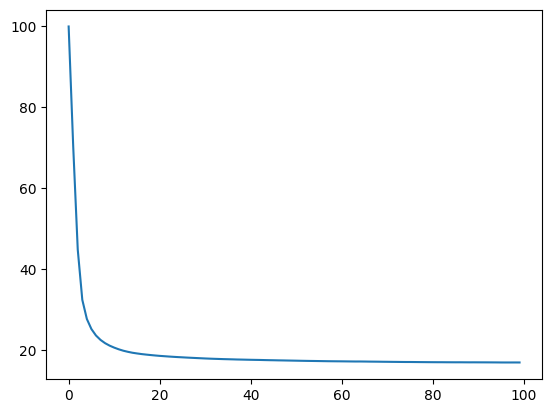

In [59]:
plt.plot(loss)

In [60]:
W[0]

array([ 0.26728242, -1.31361128])

In [61]:
B

-0.3396000000000003

In [68]:
def visualise(w1, w2, B):
    X1 = np.arange(-1, 4)
    dec_bou = -(w1 * X1 + B)/w2
    
    sup_vec_1 = -(w1 * X1 + B + 1)/w2
    sup_vec_2 = -(w1 * X1 + B - 1)/w2
    
    plt.scatter(data[:, 0], data[:, 1], c = label)
    plt.plot(X1, dec_bou, color = 'red')
    plt.plot(X1, sup_vec_1, color = 'blue')
    plt.plot(X1, sup_vec_2, color = 'green')
    

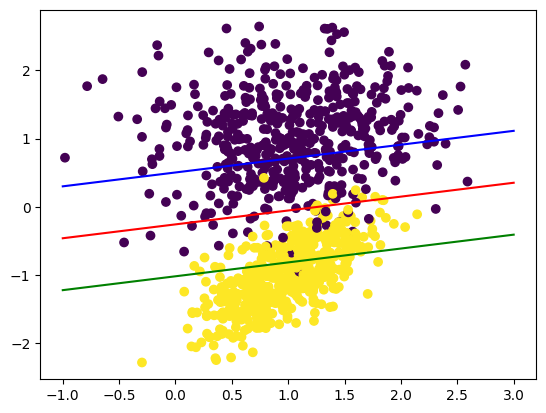

In [69]:
visualise(W[0][0], W[0][1], B)